# Import Librarie Important

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('AllPhnomList.csv')
df.head(3)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,WorkingHour,Location,DetailLocation,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Office Hour,Phnom Penh,"#106, St.304, Sangkat Beoung kang kong II, Kha...",< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Office Hour,Phnom Penh,"#153,St.Mao Tse Toung Blvd, Phnom Penh., Phnom...",No preference,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,NaN,Phnom Penh,"BanteayMeanchey, Siem Reap, Battambang, Phnom ...",< 2 years,Bachelor's Degree,18 - 28


# Copy data from orginal data 

In [3]:
df1 = df.copy()

In [4]:
df1.columns

Index(['JobTitle', 'CompanyName', 'Category', 'Salary', 'JobType',
       'JobFunction', 'PositionLevel', 'WorkingDay', 'WorkingHour', 'Location',
       'DetailLocation', 'WorkingExperience', 'Qualification', 'Age'],
      dtype='object')

In [5]:
print(df1['WorkingDay'].isnull().sum())
print(df1['WorkingHour'].isnull().sum())

13737
13737


##### We have missing alots columns : 
with columns **WorkingHour, WorkingDay, DetailLocation**

In [6]:
df1.drop(['WorkingHour','WorkingDay', 'DetailLocation'], axis=1 , inplace = True)


It's not on the right form. Let's change each columns to the right from

convert to 2 columns

## Columns Age

In [7]:
df1['Age'].unique()

array(['18 - 50', '18 - 28', '22 - 35', '20 - 50', '20 - 40', '18 - 40',
       '25 - 45', '18 - 25', '18 - 45', '30 - 50', '18 - 30', '25 - 40',
       '18 - 35', '20 - 60', '24- 32', '20 - 24', '25 - 35', '30 - 45',
       '20 - 25', '27 - 45', '20 - 30', '20 - 35', '23 - 35', '22 - 55',
       '22 - 50', '21 - 45', '23 - 45', '25 - 50', '27 - 37', '25 - 37',
       '22 - 38', '24 - 38', '20 - 34', '21 - 35', '22 - 30', '25 - 55',
       '25 - 32', '18 - 65', '22 - 40', '23 - 30', '20 - 45', '27  - 50',
       '30  - 50', '15 - 25', '19 - 35', '22 - 45', '18 - 22', '22 - 27',
       '19 - 30', '25 - 30', '18 - 24', '28 - 45', '28 - 40', '18 - 33',
       '30 - 40', '20 - 28', '18 - 26', '21 - 32', '20 - 27', '35 - 55',
       '23 - 50', '18 - 27', '27 - 35', '21 - 30', '19 - 50', '26 - 35',
       '19 - 40', '24 - 40', '18 - 38', '23 - 40', '21 - 59', '20 - 33',
       '18 - 60', '22 - 28', '18 - 32', '22 - 32', '23 - 29', '21 - 29',
       '35 - 45', '18 - 57', '28 - 35', '18 - 34',

In [8]:
df1[['min_age', 'max_age']] = df1['Age'].str.split(' - ', expand=True)
df1.drop('Age', axis='columns', inplace = True)

In [9]:
## 

## Let's check column min_age

In [10]:
df1['min_age'].unique()

array(['18', '22', '20', '25', '30', '24- 32', '27', '23', '21', '24',
       '27 ', '30 ', '15', '19', '28', '35', '26', '29', '40', 'Feb-35',
       '16', '20 -', '19 -', '17', '32', '33', '22 -35', '-0'],
      dtype=object)

In [11]:
replace_dict = {
        '19 -': 19,
        '20 -': 20,
        '24- 32': 24,
        '27 ': 27,
        '24-': 24,
        'Feb-35': 35,
        '30 ': 30,
        '22 -35':22}    
df1['min_age'] = df1['min_age'].replace(replace_dict)

In [12]:
df1['min_age']=df1['min_age'].astype(float)

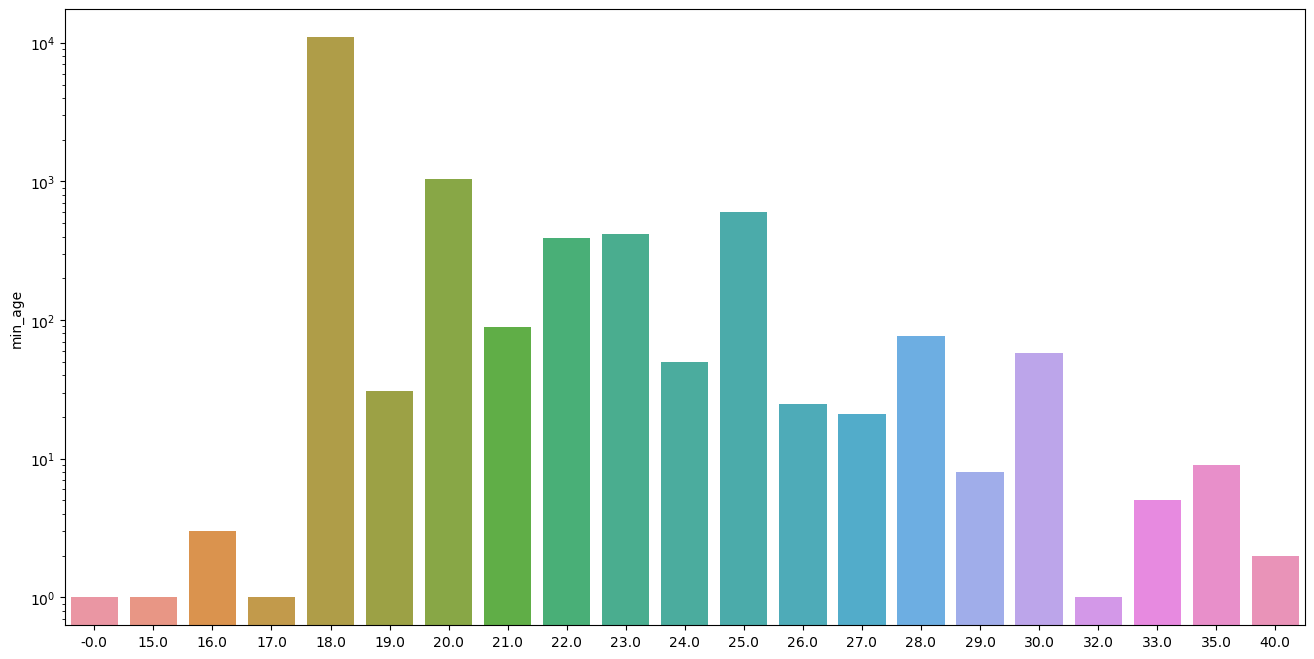

In [13]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df1['min_age'].value_counts().index, y=df1['min_age'].value_counts());
plt.yscale('log')
plt.show()

## Check columns max_age

In [14]:
df1['max_age'].unique()
df1['max_age']=df1['max_age'].astype(float)

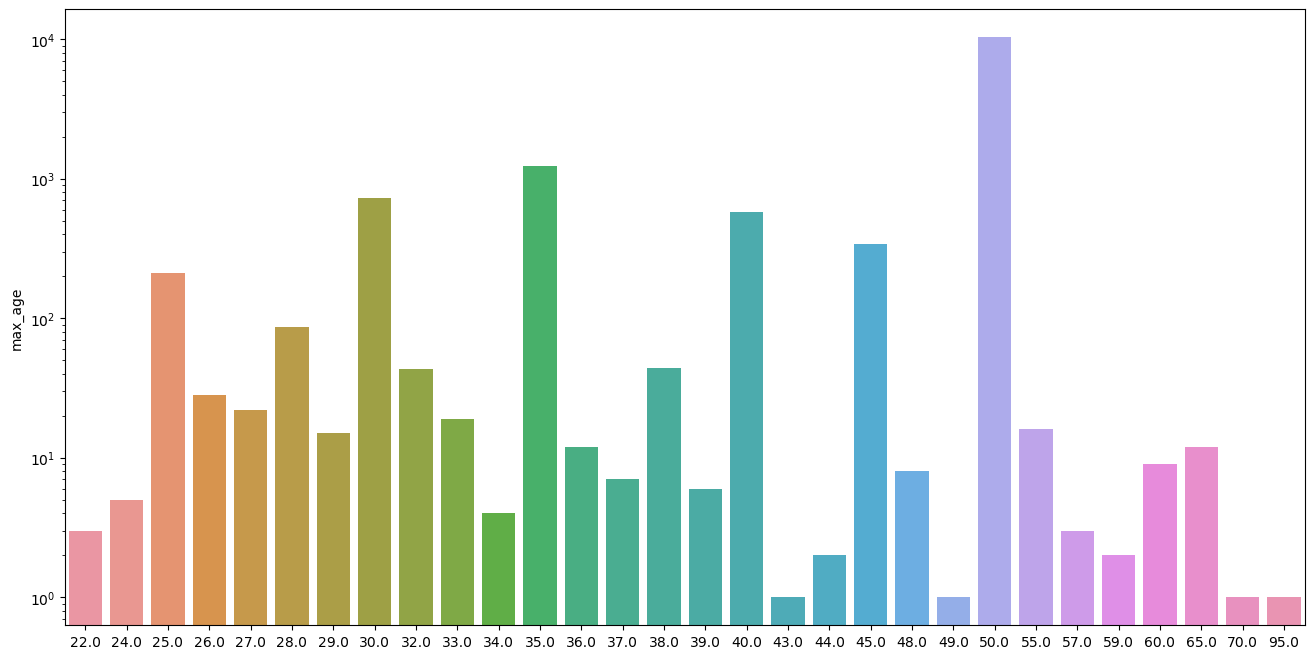

In [15]:
plt.figure(figsize=(16, 8))
sns.barplot(x=df1['max_age'].value_counts().index, y=df1['max_age'].value_counts());
plt.yscale('log')
plt.show()

## Check columns Qualification

In [16]:
df1['Qualification'].unique()

array(['High School or equivalent', "Bachelor's Degree",
       "Master's Degree", 'Phd Degree', 'Associate Degree',
       'No preference', 'Zero(0)', 'Others', 'Professional Degree',
       'University degree in banking', 'University degree',
       'The person minimum bachelor degree HR/management',
       'Technical school/institute graduate (preferably electrical or mechanical)',
       'University degree with knowledge',
       'មានកម្រិតវប្បធម៌ចាប់ពីបរិញ្ញាបត្រឡើងទៅ',
       'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ៩ ឡើងទៅ',
       'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ០៩ ឡើងទៅ',
       'ថ្នាក់បរិញ្ញាបត្រ ទាំងកំពុងសិក្សា និងបញ្ជប់',
       'University students or fresh graduates', 'University',
       'កំពុងសិក្សា ឬ គ្រោងនឹងបញ្ចប់ថ្នាក់បរិញ្ញាប័ត្រ',
       'Undergraduate Degree in a related field',
       'បរិញ្ញាបត្រផ្នែកទីផ្សារ ឬជំនាញដែលពាក់ពន្ធ័',
       'បញ្ចប់ថ្នាក់បរិញ្ញាបត្រ ឬជានិសិ្សតឆ្នាំទី៤', 'University Decree',
       '高中及以上', 'ត្រូវបានបញ្ចប់ថ្នាក់ទី១២',
       'Minimum 1 year of 

In [17]:
df1['Qualification'] = df1['Qualification'].replace({'High School or equivalent':'Bacc2', "Bachelor's Degree":'Bachelor',
                   "Master's Degree":'Master','Phd Degree':'Phd','Associate Degree':'Associate',
                   'No preference':'No','Zero(0)':'No','Professional Degree':'Professional',
                    'University degree in banking':'Banking','University degree':'Bachelor',
                   'The person minimum bachelor degree HR/management':'HR',
                    'Technical school/institute graduate (preferably electrical or mechanical)':'Technical',
                   'University degree with knowledge':'Bachelor','មានកម្រិតវប្បធម៌ចាប់ពីបរិញ្ញាបត្រឡើងទៅ':'Bachelor',
                   'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ៩ ឡើងទៅ':'Diploma','ត្រូវបានបញ្ចប់ថ្នាក់ទី១២':'Bacc2','មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ០៩ ឡើងទៅ':'Diplome',
                   'ថ្នាក់បរិញ្ញាបត្រ ទាំងកំពុងសិក្សា និងបញ្ជប់':'Bachelor','University students or fresh graduates':'Bachelor',
                    'University':'Bachelor', 'កំពុងសិក្សា ឬ គ្រោងនឹងបញ្ចប់ថ្នាក់បរិញ្ញាប័ត្រ':'Bacc2','Undergraduate Degree in a related field':'Undergraduate Degree',
                    'ចំនេះដឹងចប់ថ្នាក់ទី៩ឡើងទៅ':'Diploma','បញ្ចប់ថ្នាក់បរិញ្ញាបត្រ ឬជានិសិ្សតឆ្នាំទី៤':'Bachelor','University Decree':'Bachelor',
                    '高中及以上':'Bacc2','Minimum 1 year of experience in assisting children':'takecarechildren'
                    ,'Vocation Training':'Train','Certificate (Diploma)':'Diploma','Diplome': 'Diploma'
                                              })


C:\Users\Manon Ya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 6036 (\N{KHMER LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manon Ya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 6042 (\N{KHMER LETTER RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manon Ya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 6071 (\N{KHMER VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manon Ya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 6025 (\N{KHMER LETTER NYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manon Ya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 6098 (\N{KHMER SIGN COENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manon Ya\anaconda3\li

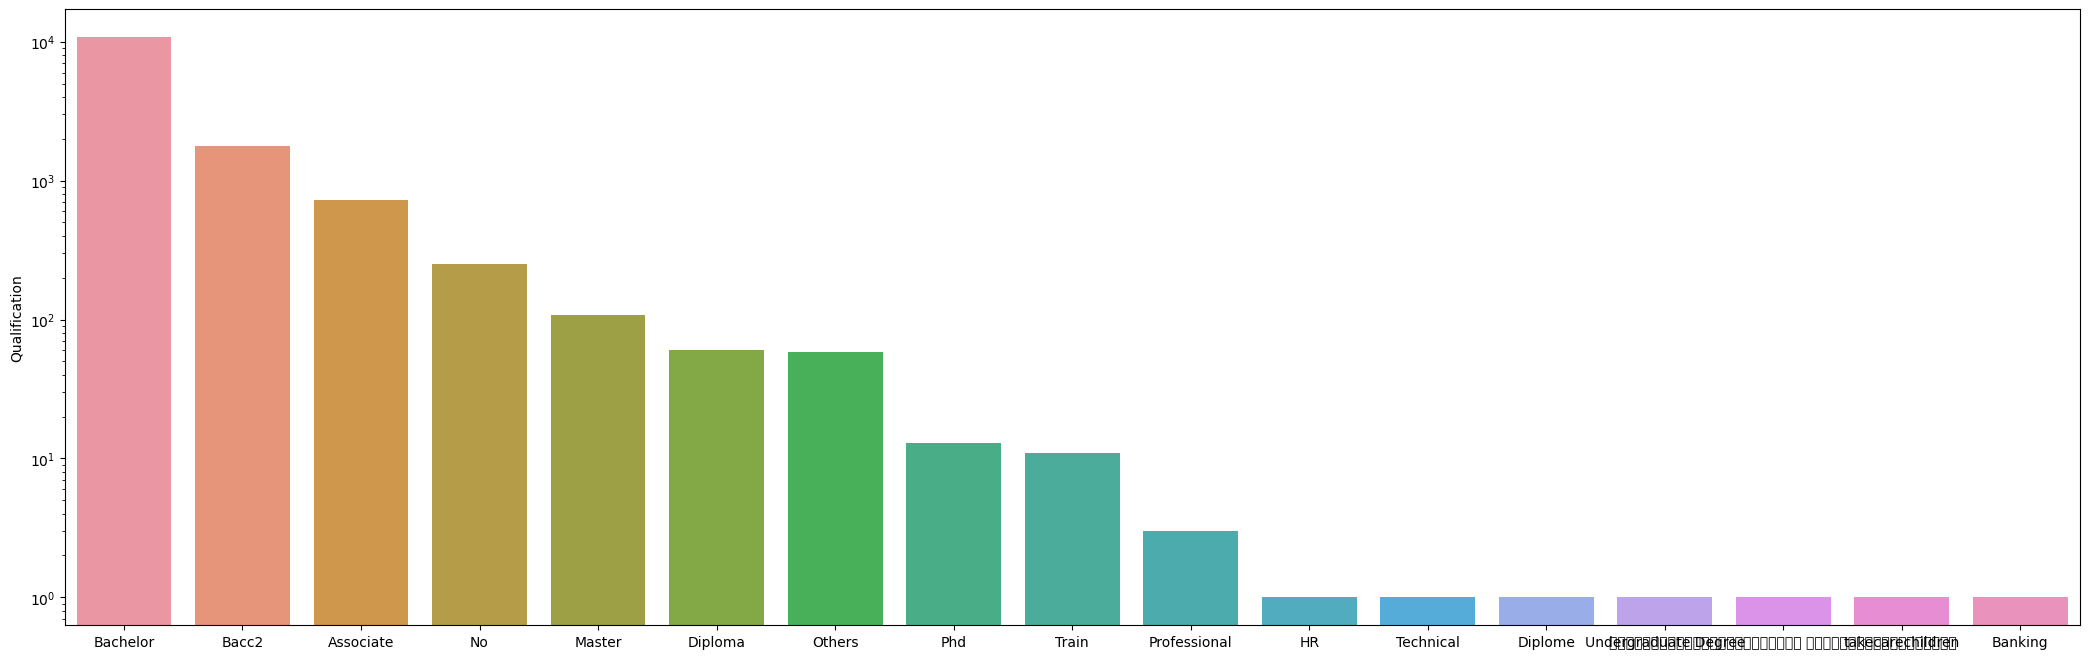

In [18]:
plt.figure(figsize=(26,8))
sns.barplot(x=df1['Qualification'].value_counts().index, y=df1['Qualification'].value_counts());
plt.yscale('log')
plt.show()

## Check column WorkingExperience

In [19]:
df1['WorkingExperience'].unique()

array(['< 2 years', 'No preference', '2-5 years', '5-8 years',
       '> 8 years'], dtype=object)

In [20]:
df1['WorkingExperience']=df1['WorkingExperience'].replace({'No preference': 0, '< 2 years':1, '2-5 years': 2,'5-8 years':5,'> 8 years':8 })

In [21]:
df1['WorkingExperience'].unique()

array([1, 0, 2, 5, 8], dtype=int64)

## Location

In [22]:
df1['Location'].unique()

array(['Phnom Penh', 'Poipet', 'Bavet', 'Preah Sihanouk', 'Kandal',
       'Siem Reap', 'Kampong Cham', 'Kampot', 'Pailin', 'Kratie',
       'Battambang', 'Prey Veng', 'Kampong Speu', 'Kampong Thom',
       'Banteay Meanchey', 'Koh Kong', 'Preah Vihear', 'Oddor Meanchey',
       'Kampong Chhnang', 'Banlung', 'Stung Treng', 'Japan', 'Svay Rieng',
       'Tbong Khmum', 'Takeo', 'Kep', 'Pursat', 'Rattanakiri',
       'United Arab Emirates', 'Takhmao', 'Mondulkiri', 'Cambodia'],
      dtype=object)

## Check column PositionLevel

In [23]:
df1['PositionLevel'].value_counts()

Junior Executive      7314
Non-Executive         4171
Senior Executive      1414
Fresh/Entry Level      500
Senior Manager         366
Manager                 34
Kindergarten/pre-k       1
Name: PositionLevel, dtype: int64

In [24]:
df1['PositionLevel']=df1['PositionLevel'].replace({'Fresh/Entry Level':'Fresh', 'Kindergarten/pre-k':'Kindergarten'})

## Check column JobFunction

In [25]:
#df1['JobFunction'].unique()

## Check columns Salary

In [26]:
for salary, count in df1['Salary'].value_counts().items():
    print(salary, count)


Negotiable 12267
$201 - $500 USD 803
< $200 USD 287
$501 - $1000 USD 271
$1001 - $1500 USD 141
> $2000 USD 18
$1501 - $2000 USD 13


In [27]:
def get_salary_range(salary_string):
    if salary_string == 'Negotiable':
        return (None, None)
    else:
        salary_string = salary_string.replace('$', '')
        salary_list = salary_string.split(' - ')
        if len(salary_list) == 2:
            salary_min = salary_list[0]
            salary_max = salary_list[1].split()[0]
            if salary_min.startswith('<'):
                salary_min = None
            else:
                salary_min = float(salary_min)
            if salary_max.startswith('>'):
                salary_max = None
            else:
                salary_max = float(salary_max)
            return (salary_min, salary_max)
        else:
            return (None, None)

In [28]:
# Create two new columns 'Salary_max' and 'Salary_min'
df1[['Salary_min', 'Salary_max']] = pd.DataFrame(df1['Salary'].apply(get_salary_range).tolist(), index=df1.index)
df1.drop('Salary', axis = 1,  inplace = True)

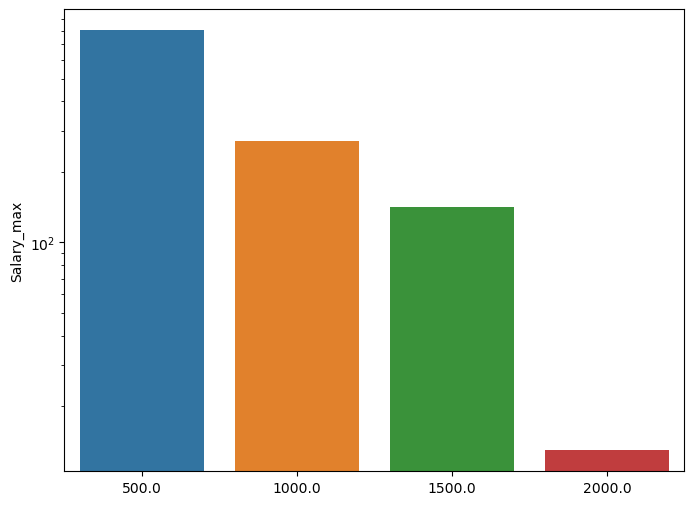

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df1['Salary_max'].value_counts().index, y=df1['Salary_max'].value_counts());
plt.yscale('log')
#plt.xlabel('')
#plt.ylabel('WorkingExperience')
plt.show()

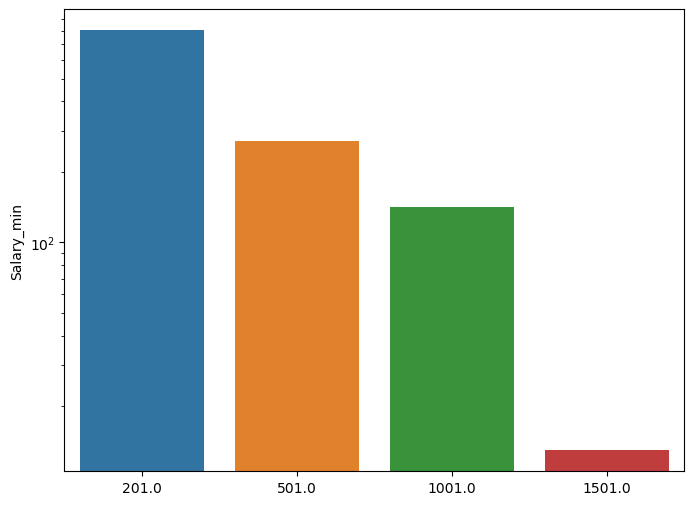

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df1['Salary_min'].value_counts().index, y=df1['Salary_min'].value_counts());
plt.yscale('log')
#plt.xlabel('')
#plt.ylabel('WorkingExperience')
plt.show()

## Chack columns Category

In [31]:
df1['Category'].unique()

array(['Human Resource / Recruitment', 'Electrical and Electronics',
       'Automotive / Vehicle', 'Food and Berverage',
       'Construction / Building / Architecture', 'Telecommunication',
       'Retail / Trading Distribution / Cosumer Products\xa0',
       'Entertainment', 'NGO / Non Profit / Social Service',
       'Advertising / PR / Events', 'General Business',
       'Hotel / Resort / Travel', 'Education / Training',
       'Information Technology\xa0/ Digital',
       'Health / Medical Care / Pharmaceutical',
       'Manufacturing / Production', 'Aerospace / Aviation',
       'Property / Real Estate', 'Logistics / Transportation / Warehouse',
       'Cosmetics & Beauty', 'Banking / Finance / Insurance / Investment',
       'Tourism', 'Clothing / Garment / Textile', 'Engineering',
       'Agriculture / Plantation', 'Accounting / Audit / Tax Firm',
       'Industrial Products', 'Legal Service / Consulting Firm',
       'Jewellery/Gems/Watches', 'Freight / Shipping',
       'Ene

## Check columns CompanyName

In [32]:
df1['CompanyName'].unique()

array(['Jobs.PhnomList & Business Training Center',
       'Eco Elictric (Pickup & Maman)', 'Meng Dy Europegas', ...,
       'PHL D AND C Co.,Ltd', 'Por Long Paper Industry',
       'Garden City Glof Club Co., Ltd'], dtype=object)

## Chek columns JobTitle

In [33]:
df1['JobTitle'].unique()

array(['Sous Chef', 'Assistant Admin & Acc',
       'Accountant / Stock Controller', ...,
       'Japanese Desk Consultant ($500-$1500)', 'Office Clark/Accountant',
       'Accountant Manager ($300-$500)'], dtype=object)

In [34]:
df1.head()

,JobTitle,CompanyName,Category,JobType,JobFunction,PositionLevel,Location,WorkingExperience,Qualification,min_age,max_age,Salary_min,Salary_max
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Full Time,General Work,Senior Executive,Phnom Penh,1,Bacc2,18.0,50.0,NaN,NaN
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Full Time,Clerical/Administrative,Junior Executive,Phnom Penh,0,Bachelor,18.0,50.0,NaN,NaN
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Full Time,General/Cost Accounting,Fresh,Phnom Penh,1,Bachelor,18.0,28.0,NaN,NaN
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Full Time,Audit and Taxation,Non-Executive,Phnom Penh,2,Bachelor,18.0,50.0,NaN,NaN
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Full Time,General/Cost Accounting,Non-Executive,Phnom Penh,1,Bachelor,18.0,50.0,NaN,NaN


## Missing value

In [35]:
df1.isnull().sum()

JobTitle                 0
CompanyName              0
Category                 0
JobType                  0
JobFunction              0
PositionLevel            0
Location                 0
WorkingExperience        0
Qualification            0
min_age                  0
max_age                  9
Salary_min           12572
Salary_max           12572
dtype: int64

## Dubplicated

In [36]:
df1.duplicated().sum()

1044

<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700"> <span style='color:#CDA63A'>|</span>Feature Enineering</div>

## Data Cleaning

### Missing value

In [37]:
df1.dropna(inplace=True)

### Dubplicated

In [38]:
df1.drop_duplicates(inplace = True)

In [39]:
df1.shape

(1183, 13)

## Outlier 

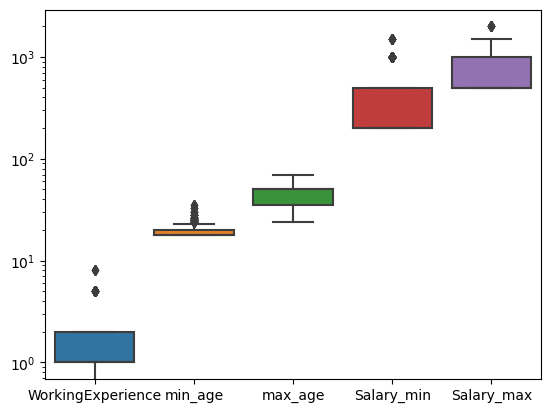

In [40]:
sns.boxplot(data = df1)
plt.yscale('log')
plt.show;

In [41]:
df2 = df1.copy()

## From df2 Check PositionLevel

In [42]:
df2.PositionLevel.unique()

array(['Kindergarten', 'Fresh', 'Senior Executive', 'Junior Executive',
       'Manager', 'Non-Executive', 'Senior Manager'], dtype=object)

##  From df2 Check Category 

In [43]:
df2.Category.unique()

array(['General Business', 'Logistics / Transportation / Warehouse',
       'Telecommunication', 'Food and Berverage',
       'Information Technology\xa0/ Digital', 'Tourism',
       'Retail / Trading Distribution / Cosumer Products\xa0',
       'Property / Real Estate', 'Agriculture / Plantation',
       'Engineering', 'Manufacturing / Production',
       'Automotive / Vehicle', 'Education / Training',
       'Construction / Building / Architecture',
       'Electrical and Electronics', 'Hotel / Resort / Travel',
       'Health / Medical Care / Pharmaceutical',
       'Banking / Finance / Insurance / Investment', 'Entertainment',
       'Advertising / PR / Events', 'Clothing / Garment / Textile',
       'NGO / Non Profit / Social Service',
       'Accounting / Audit / Tax Firm', 'Sports & Recreation',
       'Human Resource / Recruitment', 'Legal Service / Consulting Firm',
       'Cleaning Service', 'Others', 'Industrial Products',
       'Science and Technology / R&D', 'Clothing'], 

## From df2 Check JobFunction

In [44]:
df2.JobFunction.unique()

array(['Education', 'General Work', 'Logistics/Supply Chain',
       'Accounting', 'Sales / Eng/Tech/IT', 'Human Resource',
       'Top Management', 'Clerical/Administrative',
       'Retail Sales/General', 'Arts/Creative Design', 'IT',
       'Marketing/Business Development', 'Law/Legal Service',
       'Architecture/Engineering', 'Customer Service',
       'Technician/Maintenance', 'Hotel/Tourism',
       'Corporation Finance/Investment', 'Finance', 'Maintenance',
       'Driver/Security', 'Sales-Corporate',
       'Architecture/Interior Design', 'IT-Software',
       'IT-Network/Sys/DB Admin', 'Secretarial', 'Merchandising',
       'Industrial Engineering', 'Banking/Financial',
       'Property/Real Estate', 'Quality Control/Assurance',
       'Agriculture/Forestry/Fisheries', 'Advertising',
       'Purchasing/Material Mgmt', 'Nurse/Medical Support',
       'Food/Beverage/Restaurant', 'General/Cost Accounting',
       'Training and Development', 'Sales',
       'Translator (Japanese

## FRom df2 Check columns JobTitle

In [45]:
df2.JobTitle.unique()

array(['Female Foreign English Teacher Required', 'អ្នកបើកបរ',
       'សន្តិសុខ ($200 ចចារ)', ...,
       'Driverជាច្រើននាក់  (ម្ដុំប៉ុសិ៍លេខច៣)',
       'Japanese Desk Consultant ($500-$1500)',
       'Accountant Manager ($300-$500)'], dtype=object)

In [46]:
df2['JobTitle']=df2['JobTitle'].replace({'Female Foreign English Teacher Required':'Teacher','អ្នកបើកបរ':'Driver',
                                'Driverជាច្រើននាក់  (ម្ដុំប៉ុសិ៍លេខច៣)':'Driver','Japanese Desk Consultant ($500-$1500)':'Consultant',
                               'Accountant Manager ($300-$500)':'Accountant Manager'})

In [47]:
df2.drop('CompanyName',  axis = 1, inplace = True)

In [48]:
df2.drop('JobFunction',axis = 1, inplace = True)

In [49]:
df2.drop( 'Category',axis = 1, inplace=True)

In [50]:
df2.head()

,JobTitle,JobType,PositionLevel,Location,WorkingExperience,Qualification,min_age,max_age,Salary_min,Salary_max
19,Teacher,Full Time,Kindergarten,Phnom Penh,1,Bachelor,18.0,50.0,501.0,1000.0
48,Driver,Full Time,Fresh,Bavet,1,Professional,18.0,40.0,201.0,500.0
49,សន្តិសុខ ($200 ចចារ),Full Time,Fresh,Bavet,0,Others,18.0,40.0,201.0,500.0
50,Warehouse Worker ($150),Full Time,Fresh,Bavet,0,Others,18.0,40.0,201.0,500.0
51,Accountant Manager,Full Time,Senior Executive,Bavet,5,Bachelor,18.0,45.0,501.0,1000.0


In [51]:
df2['JobTitle'].value_counts()

Accountant                                 12
Sales Executive                             9
Sales Manager                               4
Designer                                    4
Restaurant Manager                          4
                                           ..
អ្នកកាន់ស្តុក និង ឆ្មាំឃ្លាំង (នៅសួង)       1
Marketing Representative (បន្ទាន់)          1
Marketing & Sales Manager                   1
Senior Tax Accountant ($ 1000 ～ $ 2000)     1
Consultant                                  1
Name: JobTitle, Length: 1081, dtype: int64

In [52]:
df2.drop('JobTitle', axis =1, inplace = True)

In [59]:
print(df2.head(30))

       JobType     PositionLevel        Location  WorkingExperience  \
19   Full Time      Kindergarten      Phnom Penh                  1   
48   Full Time             Fresh           Bavet                  1   
49   Full Time             Fresh           Bavet                  0   
50   Full Time             Fresh           Bavet                  0   
51   Full Time  Senior Executive           Bavet                  5   
52   Full Time  Junior Executive           Bavet                  2   
53   Full Time  Junior Executive           Bavet                  2   
54   Full Time  Junior Executive           Bavet                  1   
57   Full Time  Junior Executive      Phnom Penh                  2   
58   Full Time  Senior Executive      Phnom Penh                  2   
60   Full Time             Fresh      Phnom Penh                  0   
93   Full Time  Junior Executive      Phnom Penh                  2   
115  Full Time  Junior Executive      Phnom Penh                  2   
116  F

## We decide convert this data that we try to cleaning to another file easy understanding

In [55]:
df2.to_csv('data2.csv', index=False)